In [1]:
# from keras.models import Sequential
# from keras.layers import Dense, Conv2D, Flatten
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten
# from keras.layers import Conv2D, MaxPooling2D
# import keras


# Convolutional Neural Network
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2

import pandas as pd
import scipy.io as sio
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

Using TensorFlow backend.


In [2]:
data = pd.read_csv("data/training/solution.csv", index_col=0)
lable = np.asarray(data)
lable = lable-1

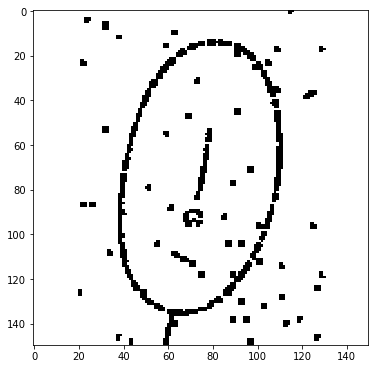

In [52]:
m = cv2.imread('data/training/training/6.png' , 1)
m = cv2.cvtColor(m, cv2.COLOR_BGR2GRAY)

ret , m= cv2.threshold(m, 0, 1, cv2.THRESH_BINARY)
m = cv2.bitwise_not(m)
m = cv2.medianBlur(m, 3)
kernel = np.ones((3,3),np.uint8)
m = cv2.dilate(m,kernel,iterations = 1)
m = cv2.medianBlur(m, 3)
height = m.shape[0]
width = m.shape[1]
if(height<width):
    diff = int((width - height)/2)
    m1 = cv2.copyMakeBorder(m, diff,diff,0,0,cv2.BORDER_CONSTANT, value = 254)
elif(height>width):
    diff = int((height - width)/2)
    m1 = cv2.copyMakeBorder(m,0,0,diff,diff,cv2.BORDER_CONSTANT, value = 254)
else:
    m1 = m
m1 =  m1[60:m1.shape[0]-60,60:m1.shape[1]-60]  
kernel = np.ones((3,3),np.uint8)
m1 = cv2.dilate(m1,kernel,iterations = 1)
# m1 = Image.fromarray(m1)
# m1 = m1.resize((150,150), Image.ANTIALIAS)
# m1 = np.asarray(m1)
kernel = np.ones((2,2),np.uint8)
m1 = cv2.dilate(m1,kernel,iterations = 1)
# m1 = cv2.bitwise_not(m1)
m1 = cv2.resize(m1,(150,150))
plt.figure(figsize=(6,10))
plt.imshow(m1 , cmap=plt.cm.binary)
#m[m > 10] = 255


plt.show()

In [3]:
data_train = []
for i in range(1,5001):
    m = cv2.imread('data/training/training/'+str(i)+'.png' , 1)
    m = cv2.cvtColor(m, cv2.COLOR_BGR2GRAY)

    ret , m= cv2.threshold(m, 0, 1, cv2.THRESH_BINARY)
    m = cv2.bitwise_not(m)
    m = cv2.medianBlur(m, 3)
    kernel = np.ones((3,3),np.uint8)
    m = cv2.dilate(m,kernel,iterations = 1)
    m = cv2.medianBlur(m, 3)
    height = m.shape[0]
    width = m.shape[1]
    if(height<width):
        diff = int((width - height)/2)
        m1 = cv2.copyMakeBorder(m, diff,diff,0,0,cv2.BORDER_CONSTANT, value = 254)
    elif(height>width):
        diff = int((height - width)/2)
        m1 = cv2.copyMakeBorder(m,0,0,diff,diff,cv2.BORDER_CONSTANT, value = 254)
    else:
        m1 = m
    m1 =  m1[60:m1.shape[0]-60,60:m1.shape[1]-60]  
    kernel = np.ones((3,3),np.uint8)
    m1 = cv2.dilate(m1,kernel,iterations = 1)
    m1 = Image.fromarray(m1)
    m1 = m1.resize((150,150), Image.ANTIALIAS)
    m1 = np.asarray(m1)
    kernel = np.ones((2,2),np.uint8)
    m1 = cv2.dilate(m1,kernel,iterations = 1)
#     m1 = cv2.bitwise_not(m1)
    m1 = cv2.resize(m1,(150,150))
    
    m1 = m1.reshape((150,150,1))
    if i%500 == 0:
        print("Check : " , i)
    
    data_train.append(m1)
    
data_t = np.asarray(data_train)

Check :  500
Check :  1000
Check :  1500
Check :  2000
Check :  2500
Check :  3000
Check :  3500
Check :  4000
Check :  4500
Check :  5000


In [17]:
sio.savemat('data/load/data_new.mat', {"data":data_t})

In [4]:
#data_t = sio.loadmat('data/load/data_new.mat')['data']
#data_t = sio.loadmat('data/load/data_b.mat')['data']
#data_t = sio.loadmat('data/load/data_low_noise.mat')['data']
#data_t = sio.loadmat('data/load/data_wb.mat')['data']

X_t = data_t.reshape(5000,150,150,1)[0:4500]/255
y_t = lable[0:4500]

X_ts = data_t.reshape(5000,150,150,1)[4500:5000] /255
y_ts = lable[4500:5000]

# train_m = X_train.mean(axis=0)
# train_s = X_train.std(axis=0)

# X_train1 = (X_train - train_m)/train_s
# X_test1 = (X_test - train_m)/train_s

(4500, 150, 150, 1)

In [16]:
model = load_model('models/paniit_final_95.65_g.h5')
# model.summary()

In [5]:
# model = Sequential()
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(150,150,1)))
# model.add(Conv2D(32, (5, 5), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.3))

# model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(64, (5, 5), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.3))

# model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(64, (5, 5), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.3))

# model.add(Flatten())
# model.add(Dropout(0.5))
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(6, activation='softmax'))

# model.compile(optimizer='Adadelta', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


visible = Input(shape=(150,150,1))
conv1 = Conv2D(16, kernel_size=4, activation='relu')(visible)
conv2 = Conv2D(16, kernel_size=4, activation='relu')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)
drop1 = Dropout(0.5)(pool1)

conv3 = Conv2D(32, kernel_size=4, activation='relu')(drop1)
conv4 = Conv2D(32, kernel_size=4, activation='relu')(conv3)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv4)
drop2 = Dropout(0.5)(pool2)

# conv5 = Conv2D(64, kernel_size=4, activation='relu')(drop2)
# conv6 = Conv2D(64, kernel_size=4, activation='relu')(conv5)
# pool3 = MaxPooling2D(pool_size=(2, 2))(conv6)
# drop3 = Dropout(0.5)(pool3)


flat = Flatten()(drop2)
hidden1 = Dense(512, activation='relu')(flat)
drop4 = Dropout(0.5)(hidden1)
hidden2 = Dense(16, activation='relu')(drop4)
output = Dense(6, activation='sigmoid')(hidden2)
model = Model(inputs=visible, outputs=output)
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_t, y_t, epochs=5, verbose =1, validation_data=(X_ts, y_ts),batch_size= 32,shuffle=True,steps_per_epoch=None)

Train on 4500 samples, validate on 500 samples
Epoch 1/5
4500/4500 [==============================] - 18s 4ms/step - loss: 1.8197 - acc: 0.1669 - val_loss: 1.7925 - val_acc: 0.1400
Epoch 2/5
4500/4500 [==============================] - 14s 3ms/step - loss: 1.7916 - acc: 0.1711 - val_loss: 1.7931 - val_acc: 0.1400
Epoch 3/5
4500/4500 [==============================] - 14s 3ms/step - loss: 1.7915 - acc: 0.1693 - val_loss: 1.7933 - val_acc: 0.1560
Epoch 4/5
1280/4500 [=======>......................] - ETA: 9s - loss: 1.7908 - acc: 0.1789

In [21]:
test_loss, test_acc = model.evaluate(X_test1, y_test)
print('Test accuracy:', test_acc)

500/500 [==============================] - 1s 2ms/step
Test accuracy: 0.15000000011920928


In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 150, 150, 32)      320       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 148, 148, 32)      9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 74, 74, 64)        18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 64)        0         
__________

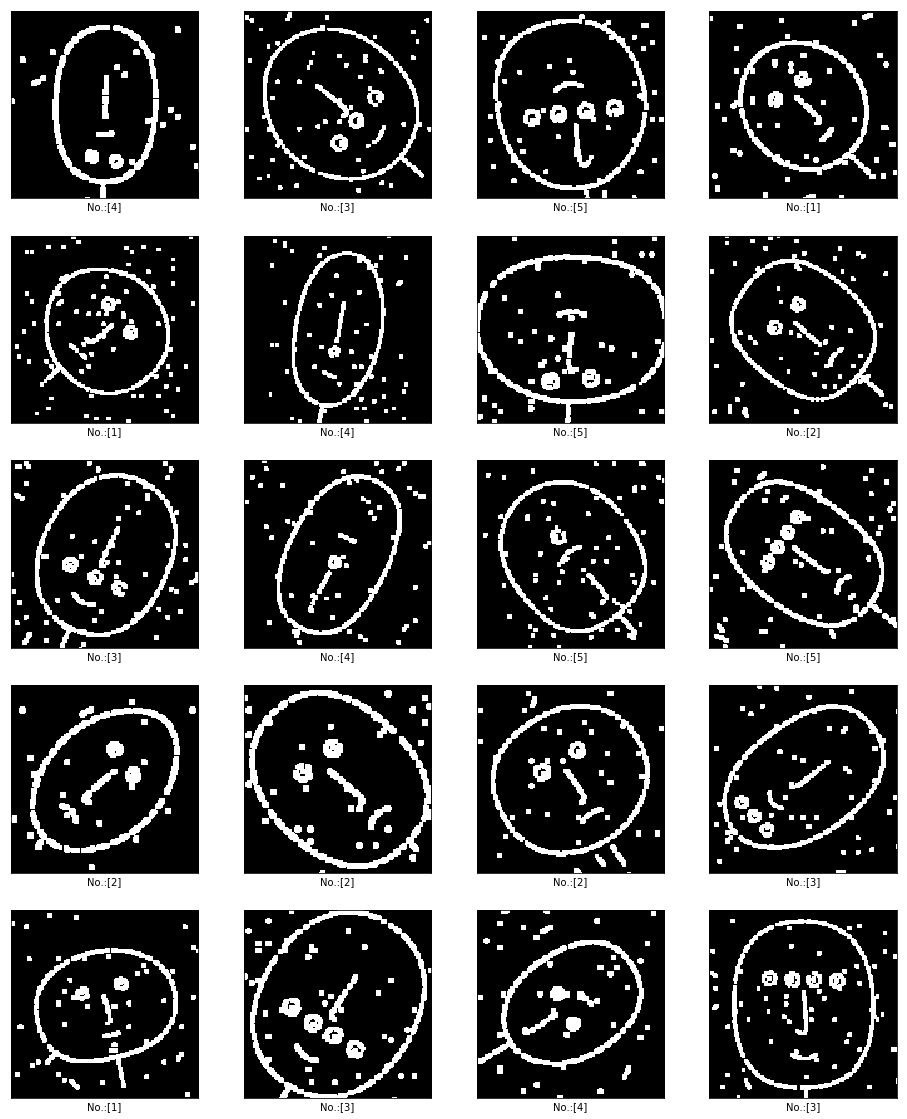

In [39]:
plt.figure(figsize=(16,20)) # width,height : (20,10) 
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(data_t[i].reshape((150,150)), cmap=plt.cm.binary)
    plt.xlabel("No.:" +str(lable[i]))
    plt.grid('off')